# Notebook for data Analysis and Data exploration of the different dataset

dataset analized
 - Ai4Mars (0.3 version), Swan et al.
 - Ai4Mars improved version proposed by us
 - dataset proposed in S5Mars, Jiahang Zhang et al. 

### depenedecies needed

In [2]:
# Import Python Package
import pandas as pd
import numpy as np
import seaborn as sns
import os
import cv2
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
#import tensorflow as tf
#from tensorflow.keras import layers, models
from plotly.subplots import make_subplots
#from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
#from tensorflow.keras.models import Model
from PIL import Image
import plotly.offline as pyo
from IPython.display import display
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import plotly.express as px
import os
import cv2
import numpy as np
import plotly.graph_objects as go



Constants

In [3]:
AI4MARS ="AI4MARS"
S5MARS = "S5MARS"

### helper funcitions

In [4]:
import matplotlib.pyplot as plt

def extractImg(path):
    # Iterate over all subdirectories in the main directory
    images = []
   
    # Iterate over all files in the add images to the list
    for filename in os.listdir(path):
        img_path = os.path.join(path, filename)
        img = cv2.imread(img_path)
        if img is not None:
            images.append(img)
    return images


def getandprintNumberofImges(path,sux = ""):
    #create a map key value pair
    map = {}

    # Iterate over each subdirectory
    for dirpath, dirnames, filenames in os.walk(path):
        num_images = 0
        # Count the number of image files in the current subdirectory
        for filename in filenames:
            if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                num_images += 1

        # Print the number of image files in the current subdirectory
        print(f"Found {num_images} images in directory: {dirpath}")
        #get just the last part of the path
        name =sux + dirpath.split("\\")[-1]
        #add the name and the number of images to the map
        if num_images > 0:
            map[name] = num_images
    return map
        
        
            
            
            


In [5]:
def plot_n_image(dict) :
    plt.bar(dict.keys(), dict.values())
    plt.xticks(rotation=90)
    plt.ylabel("Number of Images")
    #set the title
    plt.title("Number of Images in each directory of the dataset")
    #write the numebr of images on top of the bar
    for key, value in dict.items():
        plt.text(key, value, str(value), ha = 'center', va = 'bottom')
    plt.show()


In [6]:
colors_S5MARS = ['blue', 'green', 'orange', 'yellow', 'red', 'purple', 'brown', 'pink', 'lime', 'black']
colorsAI4MARS = ['blue', 'green', 'orange', 'red', 'black']
def count_image_with_labels(color_distributions, dataset = AI4MARS):
    if dataset == S5MARS:
        n_sky,n_ridge,n_soil,n_sand,n_brock,n_rock,n_rover,n_trace,n_hole,n_bk = 0,0,0,0,0,0,0,0,0,0
        for i in range(len(color_distributions)):
            if color_distributions[i][1] > 0:
                n_sky += 1
            if color_distributions[i][2] > 0:
                n_ridge += 1
            if color_distributions[i][3] > 0:
                n_soil += 1
            if color_distributions[i][4] > 0:
                n_sand += 1
            if color_distributions[i][5] > 0:
                n_brock += 1
            if color_distributions[i][6] > 0:
                n_rock += 1
            if color_distributions[i][7] > 0:
                n_rover += 1
            if color_distributions[i][8] > 0:
                n_trace += 1
            if color_distributions[i][9] > 0:
                n_hole+=1
            if color_distributions[i][0] > 0:
                n_bk+=1
        print(len(color_distributions))
        print(n_sky,n_ridge,n_soil,n_sand,n_brock,n_rock,n_rover,n_trace,n_hole,n_bk)
        counts = [n_sky,n_ridge,n_soil,n_sand,n_brock,n_rock,n_rover,n_trace,n_hole,n_bk]
        names=['sky', 'ridge', 'soil', 'sand', 'bedrock', 'rock', 'rover', 'trace', 'hole', 'NULL']
        colors = colors_S5MARS
    
    else :
        n_soil,n_brock,n_sand,n_rock,n_bk = 0,0,0,0,0
        for i in range(len(color_distributions)):
            if color_distributions[i][0] > 0:
                n_soil += 1
            if color_distributions[i][1] > 0:
                n_brock += 1
            if color_distributions[i][2] > 0:
                n_sand += 1
            if color_distributions[i][3] > 0:
                n_rock += 1
            if color_distributions[i][255] > 0:
                n_bk+=1
        print(len(color_distributions))    
        print(n_soil,n_brock,n_sand,n_rock,n_bk)   
        counts = [n_soil,n_brock,n_sand,n_rock,n_bk]
        names=['soil', 'bedrock', 'sand', 'Big Rock', 'background']
        colors = colorsAI4MARS

    # Create a bar chart of the mean color distribution
    fig = go.Figure(
        go.Bar(x=names, y=counts, name="Mean Color Distribution")
    )
    # use different colors for the bars
    
    fig.update_traces(marker_color=colors)

    # Set the title and axis labels
    fig.update_layout(
        title="Number of imgaes with each label")

    # Show the plot
    fig.show() 

    return counts


def count_total_label(color_distributions, dataset = AI4MARS):
    print(len(color_distributions))
    print(color_distributions.shape)
    sum_colors = np.sum(color_distributions, axis=0)
    if dataset == S5MARS :
        sum_colors_cleand = sum_colors[:10]
        names=['background/NULL','sky', 'ridge', 'soil', 'sand', 'bedrock', 'rock', 'rover', 'trace', 'hole']
    else:
        sum_colors_cleand = sum_colors[:4]
        sum_colors_cleand = np.append(sum_colors_cleand, sum_colors[-1])
        names=['0', '1', '2', '3', '255']


    
    print(sum_colors_cleand)
    #pie chart
    if dataset == S5MARS:
        colors = colors_S5MARS
    else:
        colors = colorsAI4MARS

    fig = px.pie(values=sum_colors_cleand, names=names, title='Pixel Distribution of labels',color=colors)
    fig.update_traces(textposition='inside', textinfo='percent+label')

    fig.show()
    return sum_colors_cleand

## AI4Mars dataset


initilization of path following the github directories structure

In [34]:
import os
import cv2

# Path to the working directory
#path_to_main_directory = os.path.join(os.getcwd(), 'data')
path_to_main_directory =  os.path.join(os.path.dirname(os.path.dirname(os.path.join(os.getcwd()))), 'dataset','ai4mars-dataset-merged-0.3')
path_to_images = os.path.join(path_to_main_directory, 'images')
path_to_label = os.path.join(path_to_main_directory, 'labels')

path_to_label_train = os.path.join(path_to_label,'train')
path_to_label_test = os.path.join(path_to_label,'test')

print(path_to_images)
#images = extractImg(path_to_imge_train)
dic1 = getandprintNumberofImges(path_to_images)
dic2 = getandprintNumberofImges(path_to_label_train,"label_")
dic3 = getandprintNumberofImges(path_to_label_test,"label_")

#create a nwe dic combining the 3 dic
dic = {**dic1, **dic2, **dic3}
print(dic)

def plot_size(path):
    # List to store file sizes
    sizes = []

    # Iterate over each file in the root directory and its subdirectories
    for dirpath, _, filenames in os.walk(path):
        for filename in filenames:
            # Get the full path of the file
            file_path = os.path.join(dirpath, filename)
            # Get the file size in bytes
            if file_path.lower().endswith(('.png', '.jpg', '.jpeg')):
                file_size = os.path.getsize(file_path)
            # Convert file size to MB and add to the list
            sizes.append(file_size / 1_000_000)
    #create a plot with plotly
    fig = px.histogram(x=sizes, nbins=40, labels={'x': 'File Size (MB)', 'y': 'Number of Images'})
    # Customize the plot
    fig.update_layout(
        xaxis_title="File Size (MB)",
        yaxis_title="Number of Images",
        showlegend=False,
        bargap=0.1,
        bargroupgap=0.1
    )
    fig.show()
    mean_size_MB = np.mean(sizes)
    std_size_MB = np.std(sizes)
    print(f"Mean file size: {mean_size_MB:.2f} MB")
    print(f"Standard deviation of file size: {std_size_MB:.2f} MB")
    return mean_size_MB, std_size_MB
        
plot_size(path_to_images)

def get_color(path, RGB = False, res = False):
    color_distributions = []
    resolutions = []

    # Iterate over each image file in each subdirectory
    for dirpath, dirnames, filenames in os.walk(path):
        for filename in filenames:
            if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                # Load the image file using OpenCV
                img_path = os.path.join(dirpath, filename)
                if RGB:
                    img = cv2.imread(img_path)
                else:
                    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                # Extract the color distribution of the image
                color_distribution = np.bincount(img.flatten(), minlength=256)
                if len(color_distribution) > 256:
                    raise ValueError(f"The color distribution of the image is too long : len = {len(color_distribution)}")
                color_distributions.append(color_distribution)

                            # Extract the resolution of the image
                resolution = img.shape[:2]
                resolutions.append(resolution)

                
    color_distributions = np.array(color_distributions)
    mean_color_distribution = np.mean(color_distributions, axis=0)
    sum_color_distribution = np.sum(color_distributions, axis=0)

    print(color_distributions)

    # Create a bar chart of the mean color distribution
    fig = go.Figure(
        go.Bar(x=np.arange(256), y=mean_color_distribution, name="Mean Color Distribution")
    )

    # Set the title and axis labels
    fig.update_layout(
        title="Mean Pixel Distribution of images",
        xaxis_title="Pixel Value",
        yaxis_title="Number of Pixels"
    )

    # Show the plot
    fig.show()

    if res :
        return color_distributions,mean_color_distribution,sum_color_distribution, resolutions
    else:
        return color_distributions,mean_color_distribution,sum_color_distribution



c:\Users\alessio\Desktop\Tesi\Code\dataset\ai4mars-dataset-merged-0.3\images
Found 0 images in directory: c:\Users\alessio\Desktop\Tesi\Code\dataset\ai4mars-dataset-merged-0.3\images
Found 322 images in directory: c:\Users\alessio\Desktop\Tesi\Code\dataset\ai4mars-dataset-merged-0.3\images\test
Found 16064 images in directory: c:\Users\alessio\Desktop\Tesi\Code\dataset\ai4mars-dataset-merged-0.3\images\train
Found 16064 images in directory: c:\Users\alessio\Desktop\Tesi\Code\dataset\ai4mars-dataset-merged-0.3\labels\train
Found 322 images in directory: c:\Users\alessio\Desktop\Tesi\Code\dataset\ai4mars-dataset-merged-0.3\labels\test
{'test': 322, 'train': 16064, 'label_train': 16064, 'label_test': 322}


Mean file size: 0.33 MB
Standard deviation of file size: 0.07 MB


number of image in the dataset

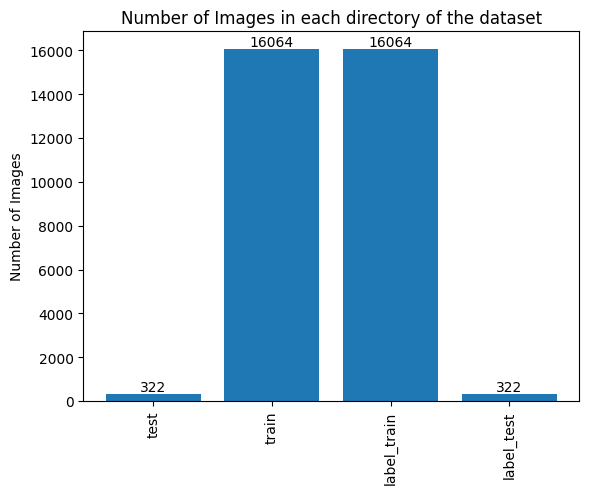

In [8]:
plot_n_image(dic)

### Images


In [9]:
print(path_to_images)

c:\Users\alessio\Desktop\Tesi\Code\dataset\ai4mars-dataset-merged-0.3\images


In [10]:
m, s = plot_size(path_to_images)



Mean file size: 0.33 MB
Standard deviation of file size: 0.07 MB


In [11]:
c_d_t, m_c_t, sum_c_t = get_color(path_to_images)

### Label Analisyis

In [12]:
m, s = plot_size(path_to_label_train)
print(f"Mean file size: {m*1000:.2f} kB")
print(f"Standard deviation of file size: {s*1000:.2f} kB")

Mean file size: 0.01 MB
Standard deviation of file size: 0.00 MB
Mean file size: 6.39 kB
Standard deviation of file size: 2.71 kB


In [13]:
c_d_l_t, m_c_l_t, sum_c_l_t = get_color(path_to_label_train)


In [14]:
count_total_label(c_d_l_t)

16064
(16064, 256)
[3485135841 4660855168 1126246813   86225600 7485861442]


array([3485135841, 4660855168, 1126246813,   86225600, 7485861442],
      dtype=int64)

In [15]:

count_image_with_labels(c_d_l_t)

16064
7929 10354 5399 2226 16064


[7929, 10354, 5399, 2226, 16064]

### TEST ANALISIS

In [16]:
m,s = plot_size(path_to_label_test)
print(f"Mean file size: {m*1000:.2f} kB")
print(f"Standard deviation of file size: {s*1000:.2f} kB")

Mean file size: 0.01 MB
Standard deviation of file size: 0.00 MB
Mean file size: 8.17 kB
Standard deviation of file size: 4.71 kB


In [36]:
#for each folder in the label test
for folder in os.listdir(path_to_label_test):
    # Get the full path of the file
    file_path = os.path.join(path_to_label_test, folder)
    print(folder)
    for dirpath, dirnames, filenames in os.walk(file_path):
        print(dirpath, dirnames, filenames)
    c,_,_ = get_color(file_path)
    count_image_with_labels(c)
    count_total_label(c)

NLA_409036068EDR_F0051606NCAM00348M1.png
<generator object _walk at 0x000002882912C490>
[]


c:\Users\alessio\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning:

Mean of empty slice.

c:\Users\alessio\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



ValueError: 
    Invalid value of type 'numpy.float64' received for the 'y' property of bar
        Received value: nan

    The 'y' property is an array that may be specified as a tuple,
    list, numpy array, or pandas Series

In [ ]:
#count_total_label(c_d_test)

In [ ]:
#count_image_with_labels(c_d_test)

## Improved Ai4Mars

In [ ]:
path_to_improved_train = os.path.join(os.path.dirname(os.path.dirname(os.path.join(os.getcwd()))), 'dataset','ai4mars-dataset-merged-0.4','labels','train')
m,s = plot_size(path_to_improved_train)
print(f"Mean file size: {m*1000:.2f} kB")
print(f"Standard deviation of file size: {s*1000:.2f} kB")

Mean file size: 0.01 MB
Standard deviation of file size: 0.00 MB
Mean file size: 9.33 kB
Standard deviation of file size: 3.54 kB


In [ ]:

c_d_i, m_c_i, sum_c_i = get_color(path_to_improved_train)

In [ ]:
count_total_label(c_d_i)

16064
(16064, 256)
[3790255727 4902356322 1277606546  431895691 6442210578]


array([3790255727, 4902356322, 1277606546,  431895691, 6442210578],
      dtype=int64)

In [ ]:
count_image_with_labels(c_d_i)

16064
9021 10951 6491 6753 16064


[9021, 10951, 6491, 6753, 16064]

### Test Analisis

In [ ]:
path_to_improved_test = os.path.join(os.path.dirname(os.path.dirname(os.path.join(os.getcwd()))), 'dataset','ai4mars-dataset-merged-0.4','labels','test')
m,s = plot_size(path_to_improved_test)
print(f"Mean file size: {m*1000:.2f} kB")
print(f"Standard deviation of file size: {s*1000:.2f} kB")

Mean file size: 0.01 MB
Standard deviation of file size: 0.00 MB
Mean file size: 6.27 kB
Standard deviation of file size: 2.71 kB


In [ ]:
c_d_i_test, m_c_i_test, sum_c_i_test = get_color(path_to_improved_test)

In [ ]:
count_total_label(c_d_i_test)

322
(322, 256)
[ 95247610  81237588  46716939   1878080 112561255]


array([ 95247610,  81237588,  46716939,   1878080, 112561255], dtype=int64)

In [ ]:
count_image_with_labels(c_d_i_test)

322
159 170 117 58 313


[159, 170, 117, 58, 313]

## S5MARS Dataset

In [99]:
path_s5mars = os.path.join(os.path.dirname(os.path.dirname(os.path.join(os.getcwd()))), 'dataset','S5Mars')
path_s5_images_train = os.path.join(path_s5mars, 'images', 'train')
path_s5_images_test = os.path.join(path_s5mars,'images','test')
path_s5_images = os.path.join(path_s5mars,'images')
path_s5_labels_train = os.path.join(path_s5mars, 'labels', 'train')
path_s5_labels_test = os.path.join(path_s5mars,'labels','test')
print(path_s5_labels_train)

c:\Users\usalv\OneDrive\Desktop\Universita\Master_Thesis\AutonomusDriving\AutonomousDrivingOnMars\dataset\S5Mars\labels\train


Found 5008 images in directory: c:\Users\usalv\OneDrive\Desktop\Universita\Master_Thesis\AutonomusDriving\AutonomousDrivingOnMars\dataset\S5Mars\images\train
Found 800 images in directory: c:\Users\usalv\OneDrive\Desktop\Universita\Master_Thesis\AutonomusDriving\AutonomousDrivingOnMars\dataset\S5Mars\images\test
Found 5008 images in directory: c:\Users\usalv\OneDrive\Desktop\Universita\Master_Thesis\AutonomusDriving\AutonomousDrivingOnMars\dataset\S5Mars\labels\train
Found 800 images in directory: c:\Users\usalv\OneDrive\Desktop\Universita\Master_Thesis\AutonomusDriving\AutonomousDrivingOnMars\dataset\S5Mars\labels\test
{'train': 5008, 'test': 800, 'label_train': 5008, 'label_test': 800}


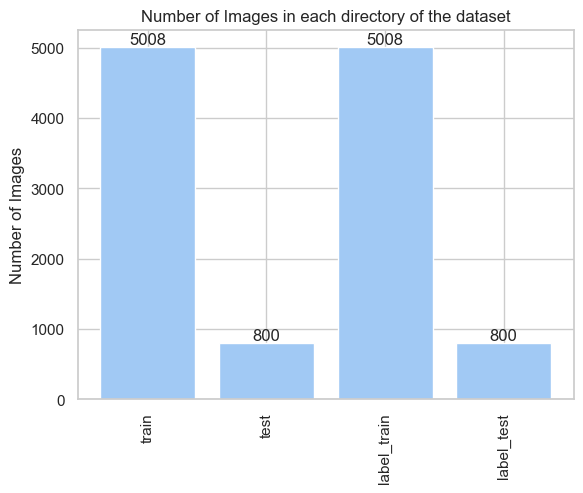

In [100]:
dic1 = getandprintNumberofImges(path_s5_images_train)
dic2 = getandprintNumberofImges(path_s5_images_test)
dic3 = getandprintNumberofImges(path_s5_labels_train,"label_")
dic4 = getandprintNumberofImges(path_s5_labels_test,"label_")

dic = {**dic1, **dic2, **dic3, **dic4}
print(dic)

plot_n_image(dic)


### Images Analisys

In [101]:
m,s = plot_size(path_s5_images)

Mean file size: 0.47 MB
Standard deviation of file size: 0.14 MB


In [102]:
c_d_s5, m_c_s5, sum_c_s5,r_s5 = get_color(path_s5_images,RGB = True, res=True)

In [103]:
px.scatter(x=[r[0] for r in r_s5], y=[r[1] for r in r_s5], labels={'x': 'Width', 'y': 'Height'}, title='Image Resolution')


Counter({(1200, 1344): 4185, (1200, 1200): 879, (1152, 1152): 278, (1200, 1408): 271, (1152, 1408): 83, (1152, 1536): 81, (1200, 1600): 29, (1200, 1536): 2})


c:\Users\usalv\anaconda3\envs\dataAnalisis\lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



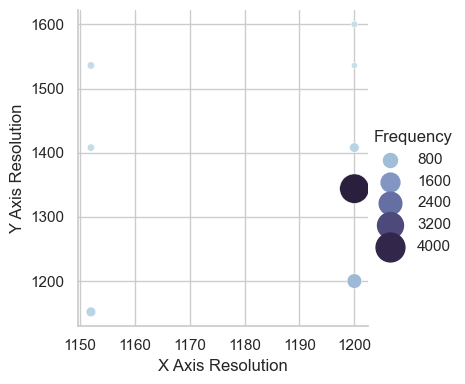

In [104]:
import collections
elements_count = collections.Counter(r_s5)
print(elements_count)

import seaborn as sns
sns.set_theme(style="white")

#make the elements count a dataframe columns=['X_Resolution', 'Y_Resolution', 'Count']
df = pd.DataFrame(((k[0],k[1], v) for k, v in elements_count.items()), columns=['X Axis Resolution','Y Axis Resolution', 'Frequency'])
df.head()

import seaborn as sns
sns.set_theme(style="whitegrid", palette="pastel")

# Plot miles per gallon against horsepower with other semantics add contunous color no legend
plot = sns.relplot(x="X Axis Resolution", y="Y Axis Resolution", size="Frequency",hue = "Frequency",
            sizes=(20, 450), alpha=1, palette="ch:s=.25,rot=-.25",
            height=4, data=df, legend=True)




### Label Train analisys

In [105]:
c_d_s5_train, m_c_s5_train, sum_c_s5_train, resolution = get_color(path_s5_labels_train,res=True)

In [106]:
px.scatter(x=[r[0] for r in resolution], y=[r[1] for r in resolution], labels={'x': 'Width', 'y': 'Height'}, title='Image Resolution')

In [107]:
# Crea un DataFrame con i dati
df = pd.DataFrame({
    'Pixel Value': range(len(sum_c_s5_train)),
    'Occurrences': sum_c_s5_train
})

# Crea l'istogramma
fig = px.histogram(df, x='Pixel Value', y='Occurrences', nbins=256, title='Histogram of Pixel Occurrences')

# Mostra l'istogramma
fig.show()

In [108]:
count_total_label(c_d_s5_train, S5MARS)

5008
(5008, 256)
[4042359590  404370284  599274070  483159995  214990526 2003518342
  112268963   14356050   32877889    7506659]


array([4042359590,  404370284,  599274070,  483159995,  214990526,
       2003518342,  112268963,   14356050,   32877889,    7506659],
      dtype=int64)

In [109]:
count_image_with_labels(c_d_s5_train, S5MARS)

5008
930 1320 2944 805 4714 2775 138 96 48 4739


[930, 1320, 2944, 805, 4714, 2775, 138, 96, 48, 4739]

### Label Test analisys

In [110]:
c_d_s5_test, m_c_s5_test, sum_c_s5_test = get_color(path_s5_labels_test)

In [111]:
count_total_label(c_d_s5_test, S5MARS)

800
(800, 256)
[668785885  53587159  82191748  92699581  34846429 303210885  20787590
   2143069   5228652   1302106]


array([668785885,  53587159,  82191748,  92699581,  34846429, 303210885,
        20787590,   2143069,   5228652,   1302106], dtype=int64)

In [112]:
count_image_with_labels(c_d_s5_test, S5MARS)

800
147 218 510 133 777 544 25 15 8 771


[147, 218, 510, 133, 777, 544, 25, 15, 8, 771]